In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Description

The dataset contains **284,000+ credit card transactions** with **31 features**.

- **V1–V28**: PCA-transformed numerical features used to anonymize sensitive transaction data.  
  These features capture underlying transaction patterns but have no direct real-world interpretation.

- **Time**: Seconds elapsed since the first transaction in the dataset.

- **Amount**: Transaction amount (scaled during preprocessing).

- **Class**: Target variable  
  - `0` → Legitimate transaction  
  - `1` → Fraudulent transaction  



## Load the dataset

In [5]:
data = pd.read_csv('creditcard.csv')

## Check the data

In [6]:
data.shape

(284807, 31)

In [7]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131848,79761.0,1.138823,-0.107509,1.114516,1.331679,-0.667761,0.486535,-0.701641,0.304035,0.966826,...,-0.070950,0.005347,-0.003271,-0.298559,0.358836,-0.338337,0.082764,0.028979,4.99,0
256620,157779.0,1.013410,-1.965536,-0.708390,0.781243,-0.194991,2.369799,-0.581227,0.632245,1.470459,...,0.102240,-0.167279,0.156678,-0.655062,-0.898179,0.112042,0.002316,0.022579,406.50,0
275523,166573.0,1.836814,0.196216,0.660446,3.888468,-0.585383,0.375638,-0.744928,0.204291,-0.092130,...,0.014586,0.118036,0.341070,-0.014655,-0.520629,-0.186152,0.032778,-0.020334,7.58,0
250390,154881.0,2.025446,-0.182133,-3.124718,-0.351030,2.606857,3.283093,-0.567551,0.834915,0.678315,...,-0.037292,0.099749,0.080716,0.631397,0.127225,0.660082,-0.021090,-0.037465,0.98,0
124395,77273.0,-0.787278,0.421308,2.467601,-2.001537,-0.320442,-0.277228,0.394893,0.037069,1.434615,...,-0.038251,0.357230,-0.369757,0.079745,0.465992,-0.755202,0.205752,-0.088948,1.00,0


In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## checking if there is any missing values

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: xlabel='Class'>

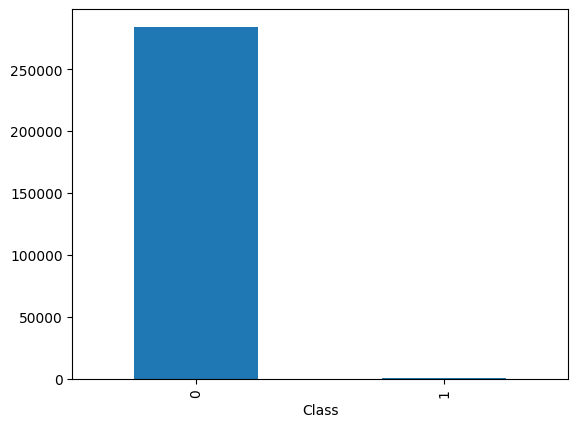

In [10]:

# Count number of samples in each class
data['Class'].value_counts().plot(kind='bar')


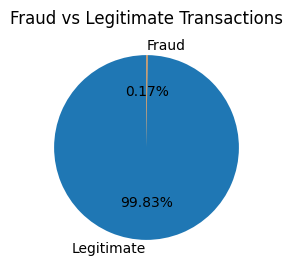

In [11]:
# Get class counts
counts = data['Class'].value_counts()

# Labels
labels = ['Legitimate', 'Fraud']

# Pie chart
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Fraud vs Legitimate Transactions')
plt.show()

#### The dataset is **highly imbalanced**, with fraud cases representing **less than 0.2%** of all transactions.


### Data Exploration

                Time       Amount
count     492.000000   492.000000
mean    80746.806911   122.211321
std     47835.365138   256.683288
min       406.000000     0.000000
25%     41241.500000     1.000000
50%     75568.500000     9.250000
75%    128483.000000   105.890000
max    170348.000000  2125.870000
                Time         Amount
count  284315.000000  284315.000000
mean    94838.202258      88.291022
std     47484.015786     250.105092
min         0.000000       0.000000
25%     54230.000000       5.650000
50%     84711.000000      22.000000
75%    139333.000000      77.050000
max    172792.000000   25691.160000


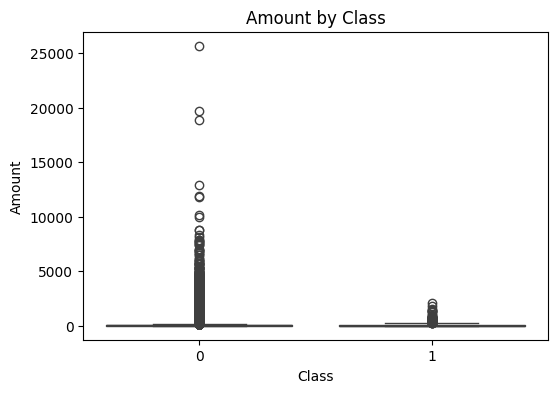

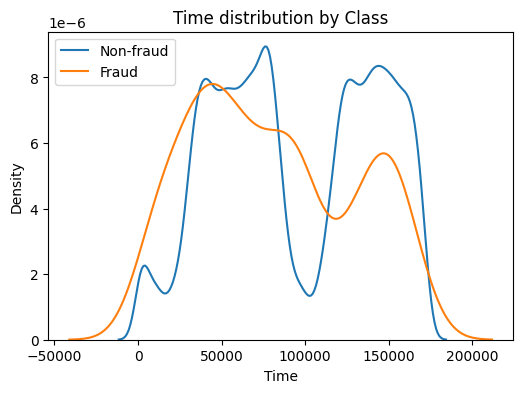

In [13]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

print(fraud[['Time', 'Amount']].describe())
print(normal[['Time', 'Amount']].describe())

# Amount vs Class
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Amount by Class')
plt.show()

# Time vs Class
plt.figure(figsize=(6,4))
sns.kdeplot(data[data['Class'] == 0]['Time'], label='Non-fraud', common_norm=False)
sns.kdeplot(data[data['Class'] == 1]['Time'], label='Fraud', common_norm=False)
plt.legend()
plt.title('Time distribution by Class')
plt.show()


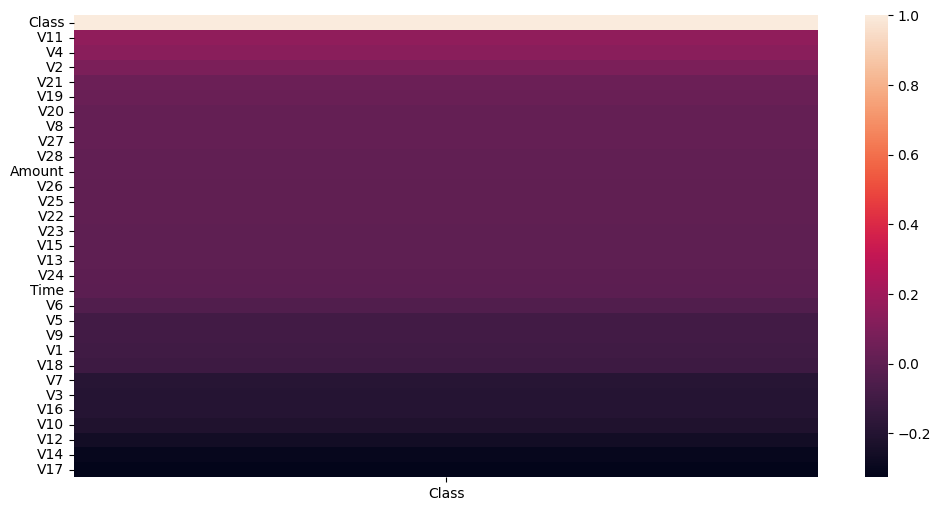

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(data.corr(numeric_only=True)[['Class']].sort_values(by='Class', ascending=False),
            )
plt.show()


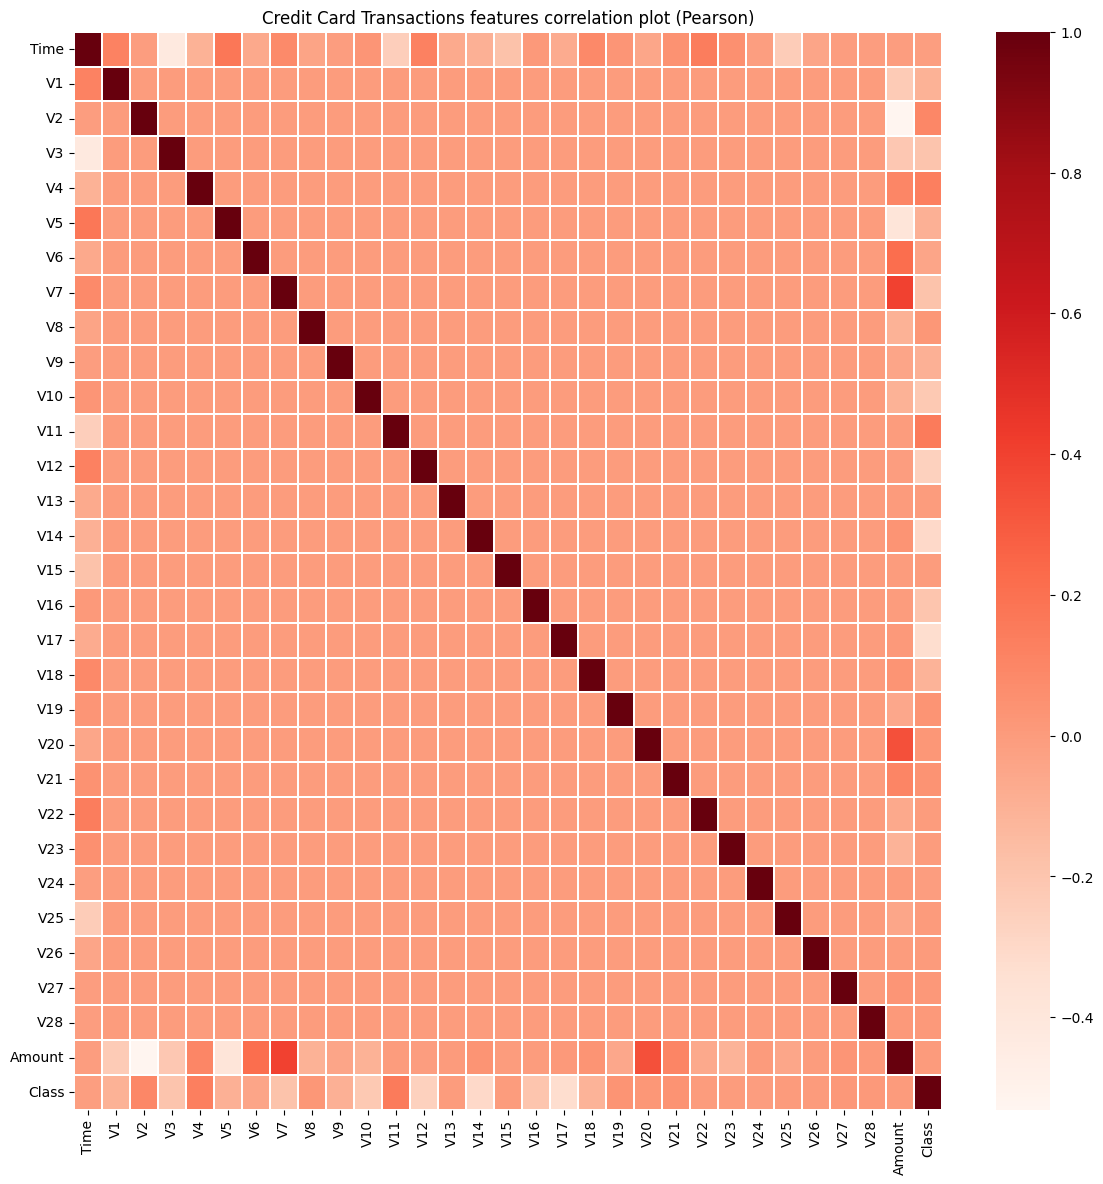

In [19]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
X = data.drop('Class', axis=1)
y = data['Class']

# 2) Stratified split to keep fraud ratio same in train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3) Scale Time and Amount (others are PCA-like already scaled)
scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    class_weight='balanced',   # handle imbalance
    max_iter=1000,
    n_jobs=-1,
)

log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    average_precision_score
)

# Class predictions and probabilities
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Basic metrics focused on fraud class (positive class = 1)
print("Precision (fraud):", precision_score(y_test, y_pred, pos_label=1))
print("Recall (fraud):   ", recall_score(y_test, y_pred, pos_label=1))
print("F1 (fraud):       ", f1_score(y_test, y_pred, pos_label=1))

# Overall classification report
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, digits=4))

# AUC-ROC (threshold‑independent)
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", roc_auc)

# PR-AUC (average precision) – very useful for imbalanced data
ap = average_precision_score(y_test, y_proba)
print("Average Precision (PR-AUC):", ap)


Confusion matrix:
 [[55478  1386]
 [    8    90]]
Precision (fraud): 0.06097560975609756
Recall (fraud):    0.9183673469387755
F1 (fraud):        0.11435832274459974

Classification report:

              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962

ROC-AUC: 0.9721687370080279
Average Precision (PR-AUC): 0.7159122424484009


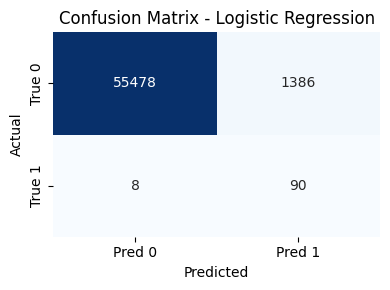

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=['Pred 0','Pred 1'],
    yticklabels=['True 0','True 1']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

/tmp/ipykernel_4010/1764287565.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


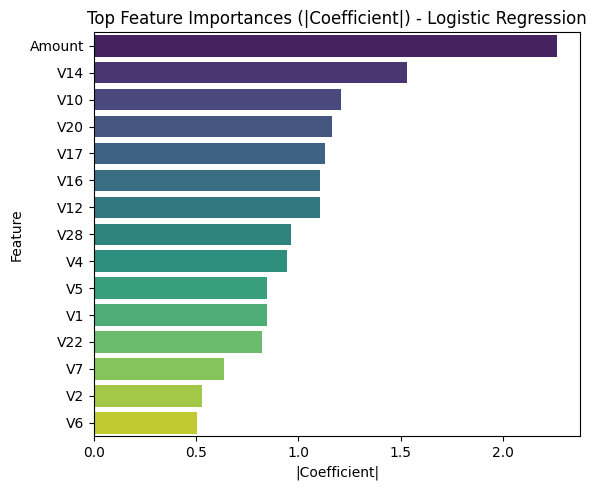

In [26]:
coeffs = log_reg.coef_[0]

feat_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(coeffs)
}).sort_values('importance', ascending=False)

top_n = 15  # number of features to show

plt.figure(figsize=(6,5))
sns.barplot(
    data=feat_importance.head(top_n),
    x='importance',
    y='feature',
    orient='h',
    palette='viridis'
)
plt.title('Top Feature Importances (|Coefficient|) - Logistic Regression')
plt.xlabel('|Coefficient|')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [29]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_ns = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced_subsample'
)

rf_ns.fit(X_train_ns, y_train_ns)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Confusion matrix (RF no scaling):
 [[56861     3]
 [   25    73]]
Precision (fraud): 0.9605263157894737
Recall (fraud):    0.7448979591836735
F1 (fraud):        0.8390804597701149

Classification report:
               precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9605    0.7449    0.8391        98

    accuracy                         0.9995     56962
   macro avg     0.9800    0.8724    0.9194     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC-AUC: 0.947053944678603
Average Precision (PR-AUC): 0.8582554967650086


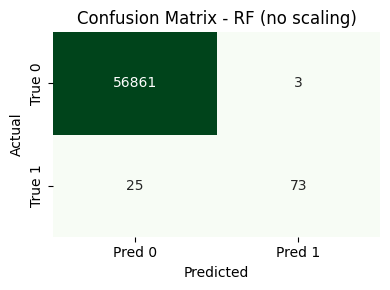

In [32]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, precision_score, recall_score,
    f1_score, average_precision_score
)
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_ns = rf_ns.predict(X_test_ns)
y_proba_ns = rf_ns.predict_proba(X_test_ns)[:, 1]

cm_ns = confusion_matrix(y_test_ns, y_pred_ns)
print("Confusion matrix (RF no scaling):\n", cm_ns)

print("Precision (fraud):", precision_score(y_test_ns, y_pred_ns, pos_label=1))
print("Recall (fraud):   ", recall_score(y_test_ns, y_pred_ns, pos_label=1))
print("F1 (fraud):       ", f1_score(y_test_ns, y_pred_ns, pos_label=1))
print("\nClassification report:\n", classification_report(y_test_ns, y_pred_ns, digits=4))
print("ROC-AUC:", roc_auc_score(y_test_ns, y_proba_ns))
print("Average Precision (PR-AUC):", average_precision_score(y_test_ns, y_proba_ns))

plt.figure(figsize=(4,3))
sns.heatmap(
    cm_ns, annot=True, fmt='d', cmap='Greens', cbar=False,
    xticklabels=['Pred 0','Pred 1'],
    yticklabels=['True 0','True 1']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RF (no scaling)')
plt.tight_layout()
plt.show()


In [36]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [38]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, precision_score, recall_score,
    f1_score, average_precision_score
)
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion matrix (GB):\n", cm_gb)

print("Precision (fraud):", precision_score(y_test, y_pred_gb, pos_label=1))
print("Recall (fraud):   ", recall_score(y_test, y_pred_gb, pos_label=1))
print("F1 (fraud):       ", f1_score(y_test, y_pred_gb, pos_label=1))

print("\nClassification report (GB):\n")
print(classification_report(y_test, y_pred_gb, digits=4))

print("ROC-AUC (GB):", roc_auc_score(y_test, y_proba_gb))
print("PR-AUC (GB):", average_precision_score(y_test, y_proba_gb))


Confusion matrix (GB):
 [[56848    16]
 [   80    18]]
Precision (fraud): 0.5294117647058824
Recall (fraud):    0.1836734693877551
F1 (fraud):        0.2727272727272727

Classification report (GB):

              precision    recall  f1-score   support

           0     0.9986    0.9997    0.9992     56864
           1     0.5294    0.1837    0.2727        98

    accuracy                         0.9983     56962
   macro avg     0.7640    0.5917    0.6359     56962
weighted avg     0.9978    0.9983    0.9979     56962

ROC-AUC (GB): 0.3468859283302516
PR-AUC (GB): 0.15665434666029338


In [39]:
import xgboost as xgb
from xgboost import XGBClassifier


In [44]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score
from sklearn.model_selection import StratifiedKFold

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.0, 2.0),
        "scale_pos_weight": scale_pos_weight,
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "tree_method": "hist",
        "n_jobs": -1,
        "random_state": 42,
    }

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    aps = []

    for train_idx, valid_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        model = XGBClassifier(**params)
        model.fit(X_tr, y_tr)

        y_val_proba = model.predict_proba(X_val)[:, 1]
        aps.append(average_precision_score(y_val, y_val_proba))

    return sum(aps) / len(aps)


In [45]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True)

print("Best value (PR-AUC):", study.best_value)
print("Best params:", study.best_params)

best_params = study.best_params
best_params.update({
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "tree_method": "hist",
    "n_jobs": -1,
    "random_state": 42,
    "scale_pos_weight": scale_pos_weight,
})

best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)


[I 2025-12-15 19:03:39,418] A new study created in memory with name: no-name-5241a0ab-5fa2-41c8-ad77-b4343a19fa6a


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-12-15 19:03:50,355] Trial 0 finished with value: 0.7845044555949653 and parameters: {'n_estimators': 317, 'max_depth': 3, 'learning_rate': 0.04063682330409179, 'subsample': 0.8428718284788432, 'colsample_bytree': 0.9050858987810915, 'min_child_weight': 1, 'gamma': 1.978882233822655}. Best is trial 0 with value: 0.7845044555949653.
[I 2025-12-15 19:04:14,866] Trial 1 finished with value: 0.8415895052994727 and parameters: {'n_estimators': 354, 'max_depth': 7, 'learning_rate': 0.0742871560393772, 'subsample': 0.8423820692936187, 'colsample_bytree': 0.7597708547586965, 'min_child_weight': 10, 'gamma': 0.6806146003047695}. Best is trial 1 with value: 0.8415895052994727.
[I 2025-12-15 19:04:40,998] Trial 2 finished with value: 0.816312259520105 and parameters: {'n_estimators': 421, 'max_depth': 8, 'learning_rate': 0.014122888707020716, 'subsample': 0.9001558854217477, 'colsample_bytree': 0.8197331589042416, 'min_child_weight': 2, 'gamma': 1.9883524915570008}. Best is trial 1 with va

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6693094252207464
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [46]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, average_precision_score,
    precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_opt = best_xgb.predict(X_test)
y_proba_opt = best_xgb.predict_proba(X_test)[:, 1]

cm_opt = confusion_matrix(y_test, y_pred_opt)
print("Confusion matrix (Optuna XGBoost):\n", cm_opt)

print("Precision (fraud):", precision_score(y_test, y_pred_opt, pos_label=1))
print("Recall (fraud):   ", recall_score(y_test, y_pred_opt, pos_label=1))
print("F1 (fraud):       ", f1_score(y_test, y_pred_opt, pos_label=1))

print("\nClassification report (Optuna XGBoost):\n")
print(classification_report(y_test, y_pred_opt, digits=4))

print("ROC-AUC:", roc_auc_score(y_test, y_proba_opt))
print("PR-AUC:", average_precision_score(y_test, y_proba_opt))


Confusion matrix (Optuna XGBoost):
 [[56848    16]
 [   16    82]]
Precision (fraud): 0.8367346938775511
Recall (fraud):    0.8367346938775511
F1 (fraud):        0.8367346938775511

Classification report (Optuna XGBoost):

              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8367    0.8367    0.8367        98

    accuracy                         0.9994     56962
   macro avg     0.9182    0.9182    0.9182     56962
weighted avg     0.9994    0.9994    0.9994     56962

ROC-AUC: 0.9798392943277479
PR-AUC: 0.879717853915631


In [47]:
best_params = {
    'n_estimators': 386,
    'max_depth': 4,
    'learning_rate': 0.10943512036320645,
    'subsample': 0.7989650073851823,
    'colsample_bytree': 0.6693094252207464,
    'min_child_weight': 6,
    'gamma': 0.45547402292571804,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'hist',
    'n_jobs': -1,
    'random_state': 42,
    'scale_pos_weight': scale_pos_weight
}

best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6693094252207464
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [48]:
y_pred_opt = best_xgb.predict(X_test)
y_proba_opt = best_xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_opt, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_opt))
print("PR-AUC:", average_precision_score(y_test, y_proba_opt))


              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8367    0.8367    0.8367        98

    accuracy                         0.9994     56962
   macro avg     0.9182    0.9182    0.9182     56962
weighted avg     0.9994    0.9994    0.9994     56962

ROC-AUC: 0.9798392943277479
PR-AUC: 0.879717853915631


In [52]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

def objective_auc(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 700),
        "max_depth": trial.suggest_int("max_depth", 3, 7),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15, log=True),
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 8),
        "gamma": trial.suggest_float("gamma", 0.0, 1.5),
        "scale_pos_weight": scale_pos_weight,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "tree_method": "hist",
        "n_jobs": -1,
        "random_state": 42,
    }

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    aucs = []

    for tr_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

        model = XGBClassifier(**params)
        model.fit(X_tr, y_tr)
        y_val_proba = model.predict_proba(X_val)[:, 1]
        aucs.append(roc_auc_score(y_val, y_val_proba))

    return sum(aucs) / len(aucs)

study_auc = optuna.create_study(direction="maximize")
study_auc.optimize(objective_auc, n_trials=60, show_progress_bar=True)

print("Best AUC value:", study_auc.best_value)
print("Best params:", study_auc.best_params)


[I 2025-12-15 19:21:57,375] A new study created in memory with name: no-name-f30405de-ad32-4884-a790-812a14bc8663


  0%|          | 0/60 [00:00<?, ?it/s]

[I 2025-12-15 19:22:06,738] Trial 0 finished with value: 0.9830642110232041 and parameters: {'n_estimators': 409, 'max_depth': 4, 'learning_rate': 0.13956405447975592, 'subsample': 0.8831282844019336, 'colsample_bytree': 0.7029616847955997, 'min_child_weight': 7, 'gamma': 1.2296518867385562}. Best is trial 0 with value: 0.9830642110232041.
[I 2025-12-15 19:22:20,614] Trial 1 finished with value: 0.983508016464557 and parameters: {'n_estimators': 454, 'max_depth': 6, 'learning_rate': 0.054914926330060065, 'subsample': 0.8818065069407851, 'colsample_bytree': 0.9992226535229671, 'min_child_weight': 6, 'gamma': 0.48193650084070083}. Best is trial 1 with value: 0.983508016464557.
[I 2025-12-15 19:22:37,802] Trial 2 finished with value: 0.9843437296334373 and parameters: {'n_estimators': 602, 'max_depth': 7, 'learning_rate': 0.04091691983088332, 'subsample': 0.7373391938595684, 'colsample_bytree': 0.9327049677336984, 'min_child_weight': 2, 'gamma': 1.4245507975337426}. Best is trial 2 with v

In [54]:
from xgboost import XGBClassifier

best_params_auc = {
    'n_estimators': 531,
    'max_depth': 6,
    'learning_rate': 0.0685197565317899,
    'subsample': 0.7216172476724478,
    'colsample_bytree': 0.9855144921628809,
    'min_child_weight': 6,
    'gamma': 0.20194599371680128,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'tree_method': 'hist',
    'n_jobs': -1,
    'random_state': 42,
    'scale_pos_weight': scale_pos_weight,
}

best_xgb_auc = XGBClassifier(**best_params_auc)
best_xgb_auc.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9855144921628809
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


Confusion matrix (final XGB):
 [[56850    14]
 [   16    82]]
Precision (fraud): 0.8541666666666666
Recall (fraud):    0.8367346938775511
F1 (fraud):        0.845360824742268

Classification report (final XGB):

              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8542    0.8367    0.8454        98

    accuracy                         0.9995     56962
   macro avg     0.9269    0.9182    0.9225     56962
weighted avg     0.9995    0.9995    0.9995     56962

Test ROC-AUC: 0.974719488245495
Test PR-AUC: 0.8811218661027747


<Figure size 800x600 with 0 Axes>

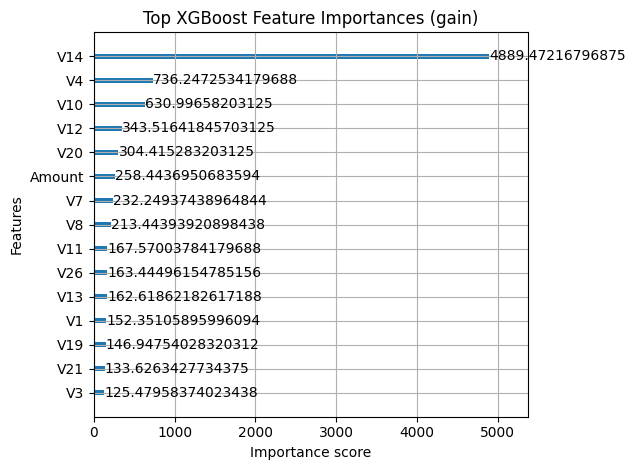

In [57]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plot_importance(
    best_xgb_auc,
    max_num_features=15,     # top 15
    importance_type='gain'   # 'gain' is usually most informative
)
plt.title("Top XGBoost Feature Importances (gain)")
plt.tight_layout()
plt.show()
